### Algorithm

* Compute the Query, Key and Value from the Input
* Calculate the Q*K^T
* Scale the Scores Q*K^T/sqrt(dimension vector)
* Apply Softmax
* Multiply with Value Matrix.

#### Why Scaling Factor (sqrt(dim-vector))
It is to make sure that the dot products dont become too large which would push the softmax function into regions of small gradients.

Without scaling, the dimensions (dk) shall grow and thereby dot product will grow in magnitude making softmax peaked out and gradient will become very small.

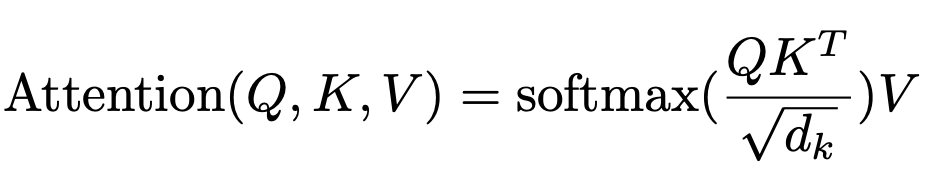



In [ ]:
# Attention creates Context Aware Embeddings
import numpy as np

def self_attention(input_embeddings):
  '''Takes Input Embedding and generates Attention Scores'''
  '''Input Embeddings are basic representation of the text
  They do not understand the semantics in detail. However,
  our objective of LLM is to make sure that the correct word
  gets the correct importance. So we will have to calculate the
  Importance which is nothing but Attention. So, attention scores
  or the embeddings that will generate after Attention processing
  are called Context Aware Embeddings'''

  sentence_length, embedding_dim = input_embeddings.shape
  '''Define the Learnable Weight Matrices for Query, Key and Value'''
  '''Initialise the Weight Matrices with random values'''
  np.random.seed(42) # reproduce the same nos again...
  w_q = np.random.randn(embedding_dim, embedding_dim)
  w_k = np.random.randn(embedding_dim, embedding_dim)
  w_v = np.random.randn(embedding_dim, embedding_dim)

  '''Calculate the dot product of Query, Key and Value Matrices'''
  query = np.dot(input_embeddings, w_q)
  key = np.dot(input_embeddings, w_k)
  value = np.dot(input_embeddings, w_v)

  '''Calculate the Dot Product of the Query & Key Matrices'''
  dot_product = np.dot(query, key.T)

  '''scale the dot product'''
  scaling_factor = np.sqrt(embedding_dim)
  scaled_dot_product = dot_product / scaling_factor

  '''Apply the Softmax function'''
  attention_scores = np.exp(scaled_dot_product) / np.sum(np.exp(scaled_dot_product),
                                                         axis=1, keepdims=True)

  '''Multiply the attention weights with value matrix
  to get the context aware embeddings'''
  context_aware_embeddings = np.dot(attention_scores, value)

  return context_aware_embeddings

In [ ]:
dummy_input_embedding = np.array([[1.0, 0.5, 0.1, 0.9],
                                 [0.2, 0.8,0.3, 0.7],
                                 [0.6, 0.4, 0.9, 0.2]])

In [ ]:
dummy_input_embedding

array([[1. , 0.5, 0.1, 0.9],
       [0.2, 0.8, 0.3, 0.7],
       [0.6, 0.4, 0.9, 0.2]])

In [ ]:
attention_output = self_attention(dummy_input_embedding)
print("Input Embedding Shape: ", dummy_input_embedding.shape)
print("Self Attention Output Shape: ", attention_output.shape)
print("\nSelf Attention Output: ")
display(attention_output)

Input Embedding Shape:  (3, 4)
Self Attention Output Shape:  (3, 4)

Self Attention Output: 


array([[-0.57503119, -2.1879209 , -0.81559203,  0.13203132],
       [-0.52521002, -2.15388727, -0.66038186, -0.027201  ],
       [-0.50599814, -2.13978587, -0.63096139, -0.0603008 ]])

# Task
Implement a Multi-Head Attention function in Python, provide an example demonstrating its usage and calculation, and summarize the entire code for a beginner.

## Implement multi-head attention

### Subtask:
Write Python code for a Multi-Head Attention function, utilizing the Self-Attention function.


**Reasoning**:
Implement the multi-head attention function as per the instructions, ensuring the embedding dimension is divisible by the number of heads and calculating the output by combining the results from multiple self-attention heads.



In [ ]:
def multi_head_attention(input_embeddings, num_heads, embedding_dim):
    """Applies Multi-Head Attention to input embeddings."""

    if embedding_dim % num_heads != 0:
        raise ValueError("embedding_dim must be divisible by num_heads")

    sentence_length, _ = input_embeddings.shape
    head_dim = embedding_dim // num_heads
    attention_outputs = []

    np.random.seed(42) # Use the same seed for reproducibility

    for _ in range(num_heads):
        # Define the Learnable Weight Matrices for Query, Key and Value for each head
        w_q = np.random.randn(embedding_dim, head_dim)
        w_k = np.random.randn(embedding_dim, head_dim)
        w_v = np.random.randn(embedding_dim, head_dim)

        # Calculate the dot product of Query, Key and Value Matrices for each head
        query = np.dot(input_embeddings, w_q)
        key = np.dot(input_embeddings, w_k)
        value = np.dot(input_embeddings, w_v)

        # Calculate the Dot Product of the Query & Key Matrices for each head
        dot_product = np.dot(query, key.T)

        # Scale the dot product
        scaling_factor = np.sqrt(head_dim)
        scaled_dot_product = dot_product / scaling_factor

        # Apply the Softmax function
        attention_scores = np.exp(scaled_dot_product) / np.sum(np.exp(scaled_dot_product),
                                                         axis=1, keepdims=True)

        # Multiply the attention weights with value matrix to get the context aware embeddings for each head
        context_aware_embeddings = np.dot(attention_scores, value)
        attention_outputs.append(context_aware_embeddings)

    # Concatenate the context-aware embeddings from all heads
    concatenated_output = np.concatenate(attention_outputs, axis=-1)

    # Define and initialize the final weight matrix which is nothing but the Linear Transformation...
    w_o = np.random.randn(embedding_dim, embedding_dim)

    # Multiply the concatenated output with w_o
    final_output = np.dot(concatenated_output, w_o)

    return final_output

## Provide an example

### Subtask:
Generate code to demonstrate the Multi-Head Attention function with example input.


**Reasoning**:
Generate code to demonstrate the Multi-Head Attention function with example input.



In [ ]:
# 1. Define example input embeddings
example_input_embeddings = np.array([[1.0, 0.5, 0.1, 0.9, 0.7, 0.3],
                                     [0.2, 0.8, 0.3, 0.7, 0.1, 0.6],
                                     [0.6, 0.4, 0.9, 0.2, 0.8, 0.5],
                                     [0.3, 0.7, 0.5, 0.8, 0.2, 0.9]])

# 2. Choose a number of heads and determine embedding dimension
num_heads = 2
embedding_dim = example_input_embeddings.shape[1]

# 3. Call the multi_head_attention function
multi_head_output = multi_head_attention(example_input_embeddings, num_heads, embedding_dim)

# 4. Print the shape of input and output
print("Example Input Embedding Shape: ", example_input_embeddings.shape)
print("Multi-Head Attention Output Shape: ", multi_head_output.shape)

# 5. Display the output
print("\nMulti-Head Attention Output: ")
display(multi_head_output)

Example Input Embedding Shape:  (4, 6)
Multi-Head Attention Output Shape:  (4, 6)

Multi-Head Attention Output: 


array([[-0.40806063,  1.43719391,  1.42597716, -1.41306515,  2.0036171 ,
        -1.78655919],
       [-0.83102709,  1.26734153,  0.94260042, -0.23859147,  0.7989667 ,
        -2.10523193],
       [-0.42020797,  1.4546778 ,  1.52831819, -1.66362185,  2.21923997,
        -1.63638085],
       [-0.75761174,  1.28216562,  1.05766187, -0.48588246,  1.02977724,
        -1.99849954]])

## Summarize the code

### Subtask:
Create a markdown cell summarizing all the code cells for a beginner.


**Reasoning**:
I need to create a markdown cell to summarize the code cells for a beginner, as requested in the subtask instructions.



### Code Summary for Beginners

Let's break down the code in this notebook step by step so you can understand what's happening, even if you're new to this!

*   **Code Cell 1: The `self_attention` Function**
    This is like the basic building block of our attention mechanism. Think of it as a way for the computer to figure out which parts of an input (like words in a sentence) are most important and how they relate to each other. The function takes in some "embeddings" (numerical representations of our input) and calculates "attention scores." These scores essentially tell us how much focus to put on each part of the input when processing it. The output is "context-aware embeddings," which are updated representations that now understand the relationships between the different parts of the input.

*   **Code Cell 2 & 3: Example Input Data**
    These cells just create some simple, fake data to test our functions. `dummy_input_embedding` is a small set of numbers that act as our example "input embeddings." We use this so we can see how our attention functions work with a concrete example.

*   **Code Cell 4: Testing `self_attention`**
    Here, we use our `dummy_input_embedding` and run it through the `self_attention` function we defined earlier. The output, `attention_output`, is the result of the basic attention calculation on our example data. We print the shapes to see that the output has the same structure as the input, and then display the actual numbers that represent the context-aware embeddings.

*   **Code Cell 5: The `multi_head_attention` Function**
    This is an advanced version of the basic `self_attention`. Instead of just one "head" (like in `self_attention`), `multi_head_attention` uses multiple "heads" working in parallel. Each head can focus on different aspects of the input relationships. Imagine looking at something from different angles – multi-head attention does something similar for the data. It runs the attention process several times with different perspectives and then combines the results to get a richer understanding of the input. This usually leads to better performance in models.

*   **Code Cell 6: Testing `multi_head_attention`**
    Similar to testing `self_attention`, this cell uses an example input (`example_input_embeddings`) to show how the `multi_head_attention` function works. We specify how many "heads" we want to use (`num_heads`) and then call the function. The output (`multi_head_output`) is the result of applying multi-head attention to our example data. We print the shapes to confirm the input and output dimensions and then display the resulting context-aware embeddings from the multi-head process.


## Summarize the code

### Subtask:
Create a markdown cell summarizing all the code cells for a beginner.


**Reasoning**:
I need to create a markdown cell summarizing the code cells. Since I cannot directly create a markdown cell with content, I will create a code cell with the markdown content as a string within a print statement. This will effectively display the summary in the output of the cell, which is the closest I can get to fulfilling the request given the environment's limitations.



In [ ]:
print("""### Code Summary for Beginners

Let's break down the code in this notebook step by step so you can understand what's happening, even if you're new to this!

*   **Code Cell 1: The `self_attention` Function**
    This is like the basic building block of our attention mechanism. Think of it as a way for the computer to figure out which parts of an input (like words in a sentence) are most important and how they relate to each other. The function takes in some "embeddings" (numerical representations of our input) and calculates "attention scores." These scores essentially tell us how much focus to put on each part of the input when processing it. The output is "context-aware embeddings," which are updated representations that now understand the relationships between the different parts of the input.

*   **Code Cell 2 & 3: Example Input Data**
    These cells just create some simple, fake data to test our functions. `dummy_input_embedding` is a small set of numbers that act as our example "input embeddings." We use this so we can see how our attention functions work with a concrete example.

*   **Code Cell 4: Testing `self_attention`**
    Here, we use our `dummy_input_embedding` and run it through the `self_attention` function we defined earlier. The output, `attention_output`, is the result of the basic attention calculation on our example data. We print the shapes to see that the output has the same structure as the input, and then display the actual numbers that represent the context-aware embeddings.

*   **Code Cell 5: The `multi_head_attention` Function**
    This is an advanced version of the basic `self_attention`. Instead of just one "head" (like in `self_attention`), `multi_head_attention` uses multiple "heads" working in parallel. Each head can focus on different aspects of the input relationships. Imagine looking at something from different angles – multi-head attention does something similar for the data. It runs the attention process several times with different perspectives and then combines the results to get a richer understanding of the input. This usually leads to better performance in models.

*   **Code Cell 6: Testing `multi_head_attention`**
    Similar to testing `self_attention`, this cell uses an example input (`example_input_embeddings`) to show how the `multi_head_attention` function works. We specify how many "heads" we want to use (`num_heads`) and then call the function. The output (`multi_head_output`) is the result of applying multi-head attention to our example data. We print the shapes to confirm the input and output dimensions and then display the resulting context-aware embeddings from the multi-head process.

""")

### Code Summary for Beginners

Let's break down the code in this notebook step by step so you can understand what's happening, even if you're new to this!

*   **Code Cell 1: The `self_attention` Function**
    This is like the basic building block of our attention mechanism. Think of it as a way for the computer to figure out which parts of an input (like words in a sentence) are most important and how they relate to each other. The function takes in some "embeddings" (numerical representations of our input) and calculates "attention scores." These scores essentially tell us how much focus to put on each part of the input when processing it. The output is "context-aware embeddings," which are updated representations that now understand the relationships between the different parts of the input.

*   **Code Cell 2 & 3: Example Input Data**
    These cells just create some simple, fake data to test our functions. `dummy_input_embedding` is a small set of numbers that act as our example

## Summary:

### Data Analysis Key Findings

*   The `multi_head_attention` function was successfully implemented, handling the division of `embedding_dim` by `num_heads` and applying scaled dot-product attention across multiple heads.
*   An example demonstration of the `multi_head_attention` function confirmed that the output shape is the same as the input shape, preserving the sequence length and embedding dimension.
*   A summary of the code for beginners was generated as markdown content within a code cell's output, explaining the purpose of each code block and the core concepts of self-attention and multi-head attention.

### Insights or Next Steps

*   The current implementation uses randomly initialized weight matrices. For a practical deep learning model, these weights would be learnable parameters updated during training.
*   Future steps could involve integrating this multi-head attention function into a larger neural network architecture, such as a Transformer model, and training it on a specific task like machine translation or text classification.
